# Cohort Analysis with Python
Pandas | Matplotlib | Seaborn


> ---
> 1. **Import and clean the Dataset**
>
> 2. **Re-Structure the Data**
>
>  3. **Group Data & Create Pivot Table**
>
>  4. **Visualization via a Heatmap**
>---


Watch the youTube tutorial by Absent Data >>>
[Here](https://www.youtube.com/watch?v=WWUG7T9ixTs)

## 1. Import and Clean the Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
# Get 
data = pd.read_excel("./Online Retail.xlsx")

In [35]:
# Check Data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,Cohort Index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [5]:
# drop rows with no customer ID
data = data.dropna(subset=['CustomerID'])

## 2. Re-Structure the Data

In [37]:
# function to extract usable date elements( month / year )
def get_month(x):
    return dt.datetime(x.year, x.month,1)

# Create an invoice month column inside the dataFrame
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)

# Create an index column( 'Cohort Month' ) with the minimum date column 'InvoiceMonth'
# 'InvoiceMonth' A.K.A. 1st time customer was acquired 
data['Cohort Month'] = data.groupby("CustomerID")['InvoiceMonth'].transform('min')

# Check Data
data.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,Cohort Index
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011-12-01,2011-05-01,8
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011-12-01,2010-12-01,13
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011-12-01,2010-12-01,13
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011-12-01,2010-12-01,13
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,2011-12-01,2010-12-01,13
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,2011-12-01,2011-08-01,5
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,2011-12-01,2011-08-01,5
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,2011-12-01,2011-08-01,5
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,2011-12-01,2011-08-01,5
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,2011-12-01,2011-08-01,5


In [7]:
# Function that extracts inidivdual date elements
# return int[ day, month, year ]

def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [38]:
# Use above function on 'IvoiceMnth' and 'Cohort Month' columns.
_, invoice_month, invoice_year = get_date_elements(data, 'InvoiceMonth')
_, cohort_month, cohort_year = get_date_elements(data, 'Cohort Month')

# NOTE: day is left blank as '_', because we only want to find the month difference 
 
# You can use the below syntax to check the data out.
# invoice_month[:5]


In [40]:
# Create a cohort index( or the difference between the cohort months and invoice months )
# a measurement of how long the customer has been retained in months
year_diff = invoice_year-cohort_year
month_diff = invoice_month-cohort_month

# Create 'Cohort Index' column.
data['Cohort Index']=year_diff * 12 + month_diff + 1

# Check Data
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,Cohort Index
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


## 3. Group data & Create a Pivot Table

In [41]:
# Group the data by the 'Cohort Month'and the 'Cohort Index' columns
# then get the coounts of 'CustomerID's per each cohort index

cohort_df = data.groupby(['Cohort Month','Cohort Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()

# NOTE: you can also just use .nunique() instead of .apply(pd.Ser...) --- however the used method is a bit more reliable

# reset_index removes the levels produced in the dataFrame

# Check Data
cohort_df.head()

,Cohort Month,Cohort Index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341


In [42]:
# Create the Pivot Table
cohort_table = cohort_df.pivot(index='Cohort Month', columns='Cohort Index', values='CustomerID')

# AND we could just apply a heat map at this point...( it is shown below )
# but we want to see percentages, 

# Chane Index format
cohort_table.index = cohort_table.index.strftime('%B %Y')

In [50]:
# Determine the retention rate among customers as a percentage  
# cohort index counts
# -------------------
# 
retention = cohort_table.divide(cohort_table.iloc[:,0],axis='index')

# Function to round percentages to neareast 0.25%
def get_nearest(number):
    return round(number*200)/200

# apply rounding function
retention = retention.apply(get_nearest);


## 4. Visualization with a Heatmap

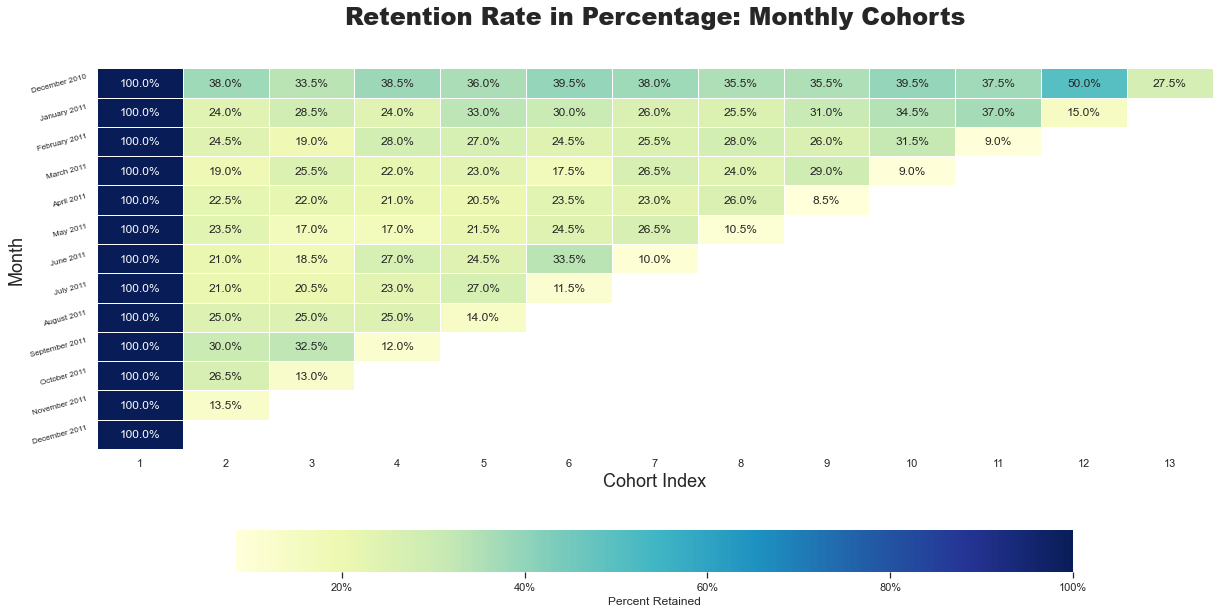

In [200]:
# Create the Figure, define size.
plt.figure(figsize=(20,10))

# Create the Heatmap Visualization and style it.
ax = sns.heatmap(
    retention,
    annot=True,
    cmap="YlGnBu",
    fmt='.1%', 
    linewidths=0.5,
    xticklabels=1,
    yticklabels=True,
    cbar_kws={
        'label': 'Percent Retained',
        'orientation':'horizontal',
        'shrink':0.75,
        'format':lambda x, pos: '{:.0%}'.format(x)
        },
    )
ax.set_title('Retention Rate in Percentage: Monthly Cohorts', { 'fontsize': 24, 'fontweight':'900'}, y=1.1)

ax.set_xlabel(s.get_xlabel(),{'fontsize': 18})
ax.set_ylabel(s.get_ylabel(),{'fontsize': 18})

ax.set_yticklabels(s.get_yticklabels(), size=8, rotation=15, va="center")

ax.tick_params(left=False, bottom=False)



# Show the figure !
plt.show()